<img src="./img/tiempo.jpg" alt="Ejemplo de imagen"  height=600>


# Uso del tiempo en Euskadi

### ¿Cuánto hemos cambiado en 30 años?



El estudio de los fenómenos sociales pone de manifiesto la necesidad de disponer de un sistema integrado de indicadores sociales. La operación Encuesta de Presupuestos de Tiempo (EPT) ofrece información exhaustiva acerca de los hábitos sociales y la vida cotidiana de la población desde la perspectiva del empleo de su tiempo diario, computando su distribución –o presupuesto- entre las actividades desarrolladas a lo largo de una jornada. Esta encuesta proporciona información útil para el análisis social desde la perspectiva de género, grupos de edad o nivel de estudios

¿Dedicamos el mismo tiempo a las tareas del hogar actualmente que hace 30 años?

¿Ha habido un cambio real en los roles de género?

¿Ha perdido fuerza el tiempo que dedicamos a las practicas religiosas?

¿Tienen más vida social los grupos de edad más jovenes que los másmayores?

Gracias a esta encuesta de presupuesto de tiempo podemos responder a estas preguntas desde 1993 hasta 2023, con encuentas realizadas cada 5 años. 

Los datos de esta Encuesta de Presupuestos de Tiempo (EPT) se corresponden a la comunidad autónoma del Pais Vasco.

------------

# Importación de librerias, Datasets y limpieza




Se importan las librerías necesarias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Carga de los 7 datasets con las encuestas de presupuestos de tiempo de cada año, entre 1993 y 1998

In [2]:
df_1993 = pd.read_csv ("data/Microdatos_EPT_1993.txt",encoding="latin1", sep=";")
df_1998 = pd.read_csv ("data/Microdatos_EPT_1998.txt",encoding="latin1", sep=";") 
df_2003 = pd.read_csv ("data/Microdatos_EPT_2003.txt",encoding="latin1", sep=";")
df_2008 = pd.read_csv ("data/Microdatos_EPT_2008.csv",encoding="latin1", sep=";")
df_2013 = pd.read_csv ("data/Microdatos_EPT_2013.txt",encoding="latin1", sep=";")
df_2018 = pd.read_csv ("data/Microdatos_EPT_2018.csv",encoding="latin1", sep=";")
df_2023 = pd.read_csv ("data/Microdatos_EPT_2023.csv",encoding="latin1", sep=";")

Como en los Data Frames de 2018 y 2023 en la columna de sexo se usa un 6 para definir a las mujeres lo sustituimos por un 2 para que vaya acorde con el resto de Data Frames.

In [3]:
df_2018["PTP_SEXO"] = df_2018["PTP_SEXO"].replace({6:2})
df_2023["PTP_SEXO"] = df_2023["PTP_SEXO"].replace({6:2})

Se crea un Data Frame general con todos los datos para hacer un estudio de la muestra general

In [4]:
df_general = pd.concat([df_1993, df_1998, df_2003,df_2008, df_2013,df_2018,df_2023], join="outer").iloc[:,:19]

In [280]:
df_general.head()

,PTP_TERR,CAPITAL,TAMANO_FAM,PTP_PERIO,PTP_AENC,PTP_SEXO,ESTADO_CIVIL,PTP_LUNAC1,PTP_EDAD1_,NIVEL_INSTRUC,RELA_ACT,PROFESION,PTP_DIASE1,PTP_TJORN,PTP_THORA,PTP_TIEMP,PTP_EXCEP,PARENTESCO,TIP_NUCL_FAM
0,1,NaN,3,1,1992,1,2,4,3.0,2.0,1,3,1,1,3,4.0,3.0,NaN,NaN
1,1,NaN,3,1,1992,2,2,1,3.0,1.0,3,2,5,0,0,3.0,3.0,2.0,NaN
2,1,NaN,3,1,1992,1,2,1,3.0,2.0,1,6,6,3,1,3.0,3.0,NaN,NaN
3,1,NaN,4,1,1992,1,1,1,2.0,1.0,1,6,7,3,1,5.0,3.0,3.0,NaN
4,1,NaN,2,1,1992,1,2,1,2.0,1.0,1,4,2,6,1,2.0,3.0,NaN,NaN


In [7]:
df_1993.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5040 entries, 0 to 5039
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5040 non-null   int64  
 1   CAPITAL        1417 non-null   float64
 2   TAMANO_FAM     5040 non-null   int64  
 3   PTP_PERIO      5040 non-null   int64  
 4   PTP_AENC       5040 non-null   int64  
 5   PTP_SEXO       5040 non-null   int64  
 6   ESTADO_CIVIL   5040 non-null   int64  
 7   PTP_LUNAC1     5040 non-null   int64  
 8   PTP_EDAD1_     5037 non-null   float64
 9   NIVEL_INSTRUC  5040 non-null   int64  
 10  RELA_ACT       5040 non-null   int64  
 11  PROFESION      5040 non-null   int64  
 12  PTP_DIASE1     5040 non-null   int64  
 13  PTP_TJORN      5040 non-null   int64  
 14  PTP_THORA      5040 non-null   int64  
 15  PTP_TIEMP      5040 non-null   int64  
 16  PTP_EXCEP      5039 non-null   float64
 17  PARENTESCO     2609 non-null   float64
 18  TIP_NUCL

In [8]:
df_1998.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5023 entries, 0 to 5022
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5023 non-null   int64  
 1   CAPITAL        2083 non-null   float64
 2   TAMANO_FAM     5023 non-null   int64  
 3   PTP_PERIO      5023 non-null   int64  
 4   PTP_AENC       5023 non-null   int64  
 5   PTP_SEXO       5023 non-null   int64  
 6   ESTADO_CIVIL   5023 non-null   int64  
 7   PTP_LUNAC1     5023 non-null   int64  
 8   PTP_EDAD1_     5023 non-null   int64  
 9   NIVEL_INSTRUC  5023 non-null   int64  
 10  RELA_ACT       5023 non-null   int64  
 11  PROFESION      5023 non-null   int64  
 12  PTP_DIASE1     5023 non-null   int64  
 13  PTP_TJORN      5023 non-null   int64  
 14  PTP_THORA      5023 non-null   int64  
 15  PTP_TIEMP      5023 non-null   int64  
 16  PTP_EXCEP      0 non-null      float64
 17  PARENTESCO     5023 non-null   int64  
 18  TIP_NUCL

In [9]:
df_2003.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5039 entries, 0 to 5038
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5039 non-null   int64  
 1   CAPITAL        2157 non-null   float64
 2   TAMANO_FAM     5039 non-null   int64  
 3   PTP_PERIO      5039 non-null   int64  
 4   PTP_AENC       5039 non-null   int64  
 5   PTP_SEXO       5039 non-null   int64  
 6   ESTADO_CIVIL   5039 non-null   int64  
 7   PTP_LUNAC1     5039 non-null   int64  
 8   PTP_EDAD1_     5039 non-null   int64  
 9   NIVEL_INSTRUC  5039 non-null   int64  
 10  RELA_ACT       5039 non-null   int64  
 11  PROFESION      5039 non-null   int64  
 12  PTP_DIASE1     5039 non-null   int64  
 13  PTP_TJORN      5039 non-null   int64  
 14  PTP_THORA      5039 non-null   int64  
 15  PTP_TIEMP      5032 non-null   float64
 16  PTP_EXCEP      5032 non-null   float64
 17  PARENTESCO     5039 non-null   int64  
 18  TIP_NUCL

In [10]:
df_2008.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6746 entries, 0 to 6745
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       6746 non-null   int64  
 1   CAPITAL        2745 non-null   float64
 2   TAMANO_FAM     6746 non-null   int64  
 3   PTP_PERIO      6746 non-null   int64  
 4   PTP_AENC       6746 non-null   int64  
 5   PTP_SEXO       6746 non-null   int64  
 6   ESTADO_CIVIL   6746 non-null   int64  
 7   PTP_LUNAC1     6746 non-null   int64  
 8   PTP_EDAD1_     6746 non-null   int64  
 9   NIVEL_INSTRUC  6744 non-null   float64
 10  RELA_ACT       6746 non-null   int64  
 11  PROFESION      6746 non-null   int64  
 12  PTP_DIASE1     6746 non-null   int64  
 13  PTP_TJORN      6746 non-null   int64  
 14  PTP_THORA      6746 non-null   int64  
 15  PTP_TIEMP      6746 non-null   int64  
 16  PTP_EXCEP      6746 non-null   int64  
 17  PARENTESCO     6746 non-null   int64  
 18  TIP_NUCL

In [11]:
df_2013.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5293 entries, 0 to 5292
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5293 non-null   int64  
 1   CAPITAL        1980 non-null   float64
 2   TAMANO_FAM     5293 non-null   int64  
 3   PTP_PERIO      5293 non-null   int64  
 4   PTP_AENC       5293 non-null   int64  
 5   PTP_SEXO       5293 non-null   int64  
 6   ESTADO_CIVIL   5293 non-null   int64  
 7   PTP_LUNAC1     5293 non-null   int64  
 8   PTP_EDAD1_     5293 non-null   int64  
 9   NIVEL_INSTRUC  5293 non-null   int64  
 10  RELA_ACT       5293 non-null   int64  
 11  PROFESION      5293 non-null   int64  
 12  PTP_DIASE1     5293 non-null   int64  
 13  PTP_TJORN      5293 non-null   int64  
 14  PTP_THORA      5293 non-null   int64  
 15  PTP_TIEMP      5293 non-null   int64  
 16  PTP_EXCEP      5293 non-null   int64  
 17  PARENTESCO     5293 non-null   int64  
 18  TIP_NUCL

In [12]:
df_2018.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5874 entries, 0 to 5873
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5874 non-null   int64  
 1   CAPITAL        2086 non-null   float64
 2   TAMANO_FAM     5874 non-null   int64  
 3   PTP_PERIO      5874 non-null   int64  
 4   PTP_AENC       5874 non-null   int64  
 5   PTP_SEXO       5874 non-null   int64  
 6   ESTADO_CIVIL   5874 non-null   int64  
 7   PTP_LUNAC1     5874 non-null   int64  
 8   PTP_EDAD1_     5874 non-null   int64  
 9   NIVEL_INSTRUC  5874 non-null   int64  
 10  RELA_ACT       5874 non-null   int64  
 11  PROFESION      5874 non-null   int64  
 12  PTP_DIASE1     5874 non-null   int64  
 13  PTP_TJORN      5874 non-null   int64  
 14  PTP_THORA      5874 non-null   int64  
 15  PTP_TIEMP      5874 non-null   int64  
 16  PTP_EXCEP      5874 non-null   int64  
 17  PARENTESCO     5874 non-null   int64  
 18  TIP_NUCL

In [14]:
df_2023.iloc[:,:27].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5650 entries, 0 to 5649
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PTP_TERR       5650 non-null   int64  
 1   CAPITAL        5650 non-null   int64  
 2   TAMANO_FAM     5650 non-null   int64  
 3   PTP_PERIO      5650 non-null   int64  
 4   PTP_AENC       5650 non-null   int64  
 5   PTP_SEXO       5650 non-null   int64  
 6   ESTADO_CIVIL   5650 non-null   int64  
 7   PTP_LUNAC1     5650 non-null   int64  
 8   PTP_EDAD1_     5650 non-null   int64  
 9   NIVEL_INSTRUC  4865 non-null   float64
 10  RELA_ACT       5650 non-null   int64  
 11  PROFESION      5650 non-null   int64  
 12  PTP_DIASE1     5650 non-null   int64  
 13  PTP_TJORN      5650 non-null   int64  
 14  PTP_THORA      5650 non-null   int64  
 15  PTP_TIEMP      5650 non-null   int64  
 16  PTP_EXCEP      5650 non-null   int64  
 17  PARENTESCO     5650 non-null   int64  
 18  TIP_NUCL

# Análisis e hipótesis

## Entendiendo la muestra

In [28]:
len(df_1993) +len(df_1998) +len(df_2003) + len(df_2008) + len(df_2013) + len(df_2018) + len(df_2023)

38665

### El tamaño de la muestra de cada encuesta es de:

In [4]:
print(f"En 1993 se encuestó a {len(df_1993)} personas")
print(f"En 1998 se encuestó a {len(df_1998)} personas")
print(f"En 2003 se encuestó a {len(df_2003)} personas")
print(f"En 2008 se encuestó a {len(df_2008)} personas")
print(f"En 2013 se encuestó a {len(df_2013)} personas")
print(f"En 2018 se encuestó a {len(df_2018)} personas")
print(f"En 2023 se encuestó a {len(df_2023)} personas")

En 1993 se encuestó a 5040 personas
En 1998 se encuestó a 5023 personas
En 2003 se encuestó a 5039 personas
En 2008 se encuestó a 6746 personas
En 2013 se encuestó a 5293 personas
En 2018 se encuestó a 5874 personas
En 2023 se encuestó a 5650 personas


### Géneros

Se representa el porcentaje de hombres y mujeres general de todas las encuestas

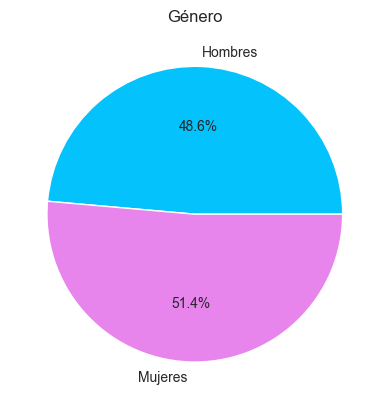

In [281]:
plt.pie(df_general["PTP_SEXO"].value_counts().sort_index(), labels=["Hombres", "Mujeres"], autopct='%1.1f%%',colors=["#03c2fc", "#e885ed"])
plt.title("Género");

### Edades

Se representa el porcentaje de cada grupo de edad de todas las encuestas

In [13]:
df_general["PTP_EDAD1_"].value_counts()

PTP_EDAD1_
3.0    16356
4.0    11642
2.0     8977
1.0     1687
Name: count, dtype: int64

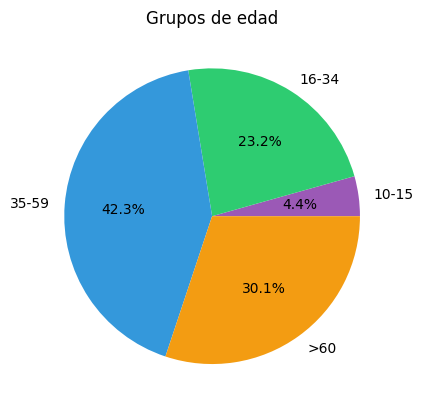

In [5]:
plt.pie(df_general["PTP_EDAD1_"].value_counts().sort_index(),labels=["10-15","16-34", "35-59", ">60" ], autopct='%1.1f%%',colors=["#9B59B6", "#2ECC71", "#3498DB", "#F39C12"])
plt.title("Grupos de edad");

###  Estudios finalizados

In [15]:
df_general["NIVEL_INSTRUC"].value_counts()

NIVEL_INSTRUC
1.0    16891
2.0    12057
3.0     8930
Name: count, dtype: int64

Se representa el porcentaje de cada nivel de estudios maximo completado de todas las muestras

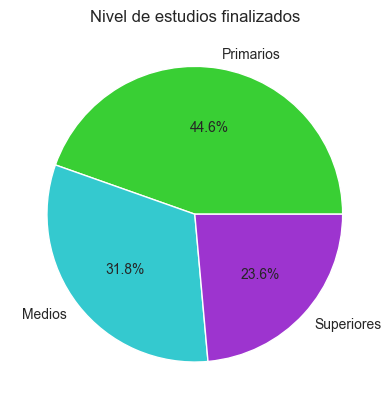

In [283]:
plt.pie(df_general["NIVEL_INSTRUC"].value_counts().sort_index(),labels=["Primarios", "Medios", "Superiores"], autopct='%1.1f%%', colors=["#39cf34", "#34c9cf", "#9d34cf" ])
plt.title("Nivel de estudios finalizados");

### Situacion de empleo

Se representa el porcentaje de cada situación laboral de cada uno de los encuestados de todas las muestras

In [17]:
df_general["RELA_ACT"].value_counts()

RELA_ACT
1    18548
3    17344
2     2773
Name: count, dtype: int64

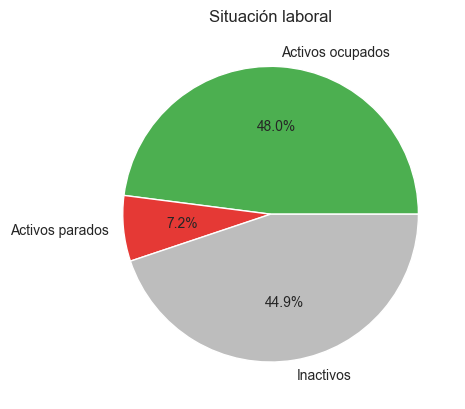

In [284]:
plt.pie(df_general["RELA_ACT"].value_counts().sort_index(),labels=["Activos ocupados","Activos parados", "Inactivos"], autopct='%1.1f%%',colors=["#4CAF50", "#E53935", "#BDBDBD" ])
plt.title("Situación laboral");

## Hipotesis 1:
La brecha por sexos del tiempo dedicado a las tareas de hogar se ha reducido a lo largo de los años. 

### Cálculo de la media horas diarias dedicadas a las tareas domesticas en función del genero

Se crea un nuevo DataFrame con los años de la encuesta y cada una de las medias en horas del tiempo dedicadoa las tareas domesticas y otro similar pero agrupado por géneros.

In [107]:
df_tareas = pd.DataFrame({"1993":df_1993["ACTP1_3"].mean()/3600,
                               "1998":df_1998["ACTP1_3"].mean()/3600,                    
                               "2003":df_2003["ACTP1_3"].mean()/3600,
                               "2008":df_2008["ACTP1_3"].mean()/3600,
                               "2013":df_2013["ACTP1_3"].mean()/3600,
                               "2018":df_2018["ACTP1_3"].mean()/3600,
                               "2023":df_2023["ACTP1_3"].mean()/3600}, index=["Media"])

In [92]:
df_sexo_tareas = pd.DataFrame({"1993":df_1993.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,
                               "1998":df_1998.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,                    
                               "2003":df_2003.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,
                               "2008":df_2008.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,
                               "2013":df_2013.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,
                               "2018":df_2018.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600,
                               "2023":df_2023.groupby("PTP_SEXO")["ACTP1_3"].mean()/3600})

Se cambia el nombre de la columna PTP_SEXO por Género

In [93]:
df_sexo_tareas["Género"] = ["Hombres", "Mujeres"]

Se establece la columna Género como indice

In [94]:
df_sexo_tareas.set_index("Género", inplace=True)

Se representa con un grafico las horas medis que se dedica a las tareas del hogar por años

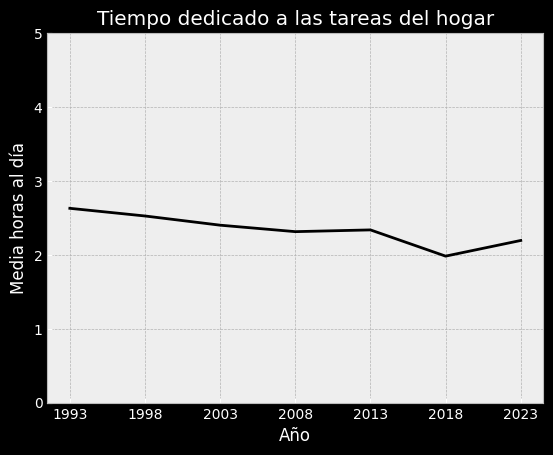

In [175]:
df_tareas.T.plot(kind="line", legend=False, xlabel="Año", ylabel="Media horas al día", ylim=(0,5), title="Tiempo dedicado a las tareas del hogar", color="black");

Se representa mediante un grafico de linea la media de horas que dedican las mujeres y los hombres por separado a las tareas domésticas a lo largo de los años

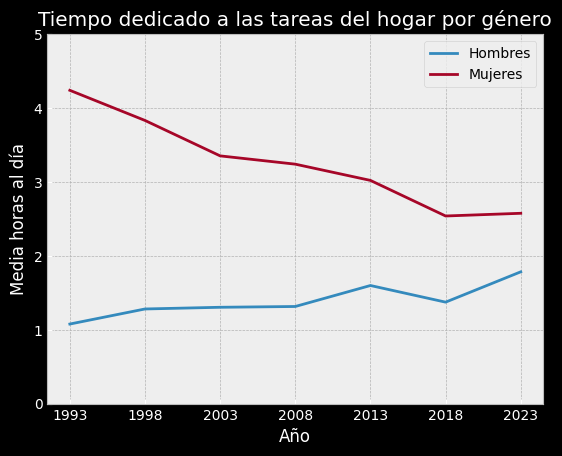

In [ ]:
df_sexo_tareas.T.plot(kind="line")
plt.xlabel("Año")
plt.ylabel("Media horas al día")
plt.ylim(0,5)
legend = plt.legend()
for text in legend.get_texts():
    text.set_color('black')
plt.title("Tiempo dedicado a las tareas del hogar por género");


Definimos un nuevo Data Frame que sea el resultado de restar el tiempo que dedican las mujeres a las tareas domesticas frente a los hombres

In [143]:
df_diferencia_tareas = df_sexo_tareas.loc["Mujeres"] - df_sexo_tareas.loc["Hombres"]

Se representa la diferencia de horas dedicadas a las tareas domesticas entre hombres y mujeres a lo largo de los años en un gráfico de barras

In [196]:
plt.style.use("default")

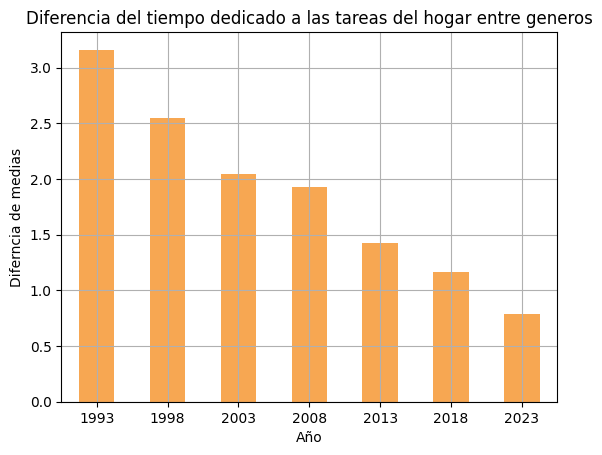

In [197]:
df_diferencia_tareas.plot(kind="bar",xlabel="Año", ylabel="Diferncia de medias", grid=True, title="Diferencia del tiempo dedicado a las tareas del hogar entre generos", color="#f7a752")
plt.xticks(rotation=0);

# Hipótesis 2: 
El tiempo dedicado a la participación religiosa ha disminuido a lo largo de los años. 

Se crea un nuevo Data Frame que contenga las medias de tiempo dedicados a la religión en cada uno de los años

In [26]:
df_religion = pd.DataFrame({"1993":df_1993["ACTP2_53"].mean(),
                               "1998":df_1998["ACTP2_53"].mean(),
                               "2003":df_2003["ACTP2B_53"].mean(),
                               "2008":df_2008["ACTP2B_53"].mean(),
                               "2013":df_2013["ACTP2B_53"].mean(),
                               "2018":df_2018["ACTP2B_53"].mean(),
                               "2023":df_2023["ACTP2B_53"].mean()}, index=[0])

Se representan las medias de tiempo que se dedica a la religión en cada uno de los año. Como en el Data Frame original está en segundos dividimos entre 60 para pasarlo a minutos

In [28]:
sns.set_style("whitegrid")

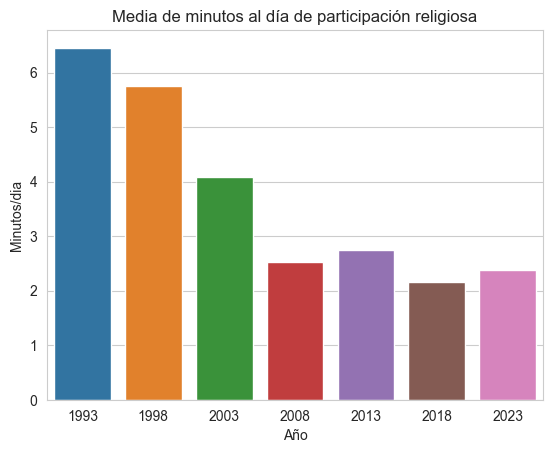

In [29]:
sns.barplot(df_religion/60)
plt.xlabel("Año")
plt.ylabel("Minutos/dia")
plt.title("Media de minutos al día de participación religiosa");

Se crea un nuevo Data Frame con las columnas religión de cada uno de los años

In [30]:
rel_1993 = df_1993["ACTP2_53"]
rel_1998 = df_1998["ACTP2_53"]
rel_2003 = df_2003["ACTP2B_53"]
rel_2008 = df_2008["ACTP2B_53"]
rel_2013 = df_2013["ACTP2B_53"]
rel_2018 = df_2018["ACTP2B_53"]
rel_2023 = df_2023["ACTP2B_53"]

Como las medias de cada año son muy  bajas (maximo de 6 minutos al día), se crea un violinplot para ver la distribucion de la columna de religión en cada año

In [31]:
rel_violin = pd.DataFrame((rel_1993, rel_1998,  rel_2003,  rel_2008, rel_2013, rel_2018, rel_2023), index=["1993", "1998","2003", "2008",  "2013",  "2018", "2023"]).T

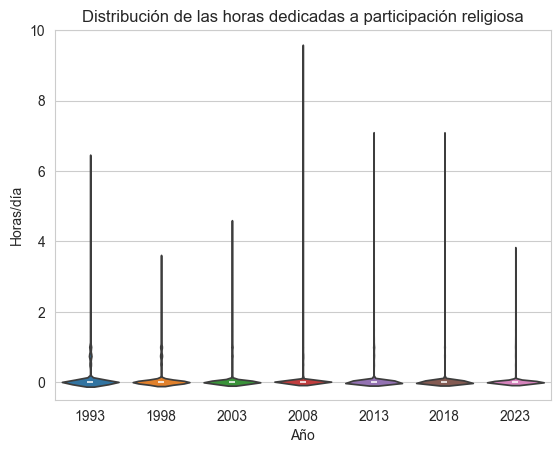

In [34]:
sns.violinplot(data=(rel_violin/3600))
plt.title("Distribución de las horas dedicadas a participación religiosa")
plt.ylim(-0.5,10)
plt.xlabel("Año")
plt.ylabel("Horas/día");


Al ser todas las medianas y el percentil 75 = 0, se opta por estudiar el numero  de personas que si practican la religión.

Se crea un nuevo Data Frame con las columnas de tiempo dedicado a la religión sin diferenciar por años y se filtra por las filas que sean mayor que 0

In [255]:
df_religion_general = pd.concat([df_1993["ACTP2_53"],df_1998["ACTP2_53"],df_2003["ACTP2B_53"],df_2008["ACTP2B_53"],df_2013["ACTP2B_53"],df_2018["ACTP2B_53"],df_2023["ACTP2B_53"]])

In [256]:
df_religion_general.describe()

count    38665.000000
mean       216.699858
std       1018.797907
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      34200.000000
dtype: float64

In [257]:
df_religion_general[df_religion_general>0].describe()

count     2465.000000
mean      3399.066937
std       2337.856148
min        300.000000
25%       2400.000000
50%       2700.000000
75%       3600.000000
max      34200.000000
dtype: float64

Se calcula el porcentaje de personas que han dedicado al menos 1 segundo a la religion

In [258]:
len(df_religion_general[df_religion_general>0])/len(df_religion_general)*100 # Porcentaje de personas que han dedicado al menos 1 segundo a la religion

6.375274796327428

Se crea un Data Frame con el numero de personas que dedican a la religión al menos 1 segundo

In [259]:
# Numero de personas que han dedicado al menos 1 segundoa la religión por año

df_religion_sin_cero = pd.DataFrame({"1993":df_1993["ACTP2_53"][df_1993["ACTP2_53"]>0].count(),
                               "1998":df_1998["ACTP2_53"][df_1998["ACTP2_53"]>0].count(),
                               "2003":df_2003["ACTP2B_53"][df_2003["ACTP2B_53"]>0].count(),
                               "2008":df_2008["ACTP2B_53"][df_2008["ACTP2B_53"]>0].count(),
                               "2013":df_2013["ACTP2B_53"][df_2013["ACTP2B_53"]>0].count(),
                               "2018":df_2018["ACTP2B_53"][df_2018["ACTP2B_53"]>0].count(),
                               "2023":df_2023["ACTP2B_53"][df_2023["ACTP2B_53"]>0].count()}, index=[0])

Se representa con un grafico de barras como ha evolucionado el numero de personas que dedican al menos 1 segundo a la religión a lo largo de los años

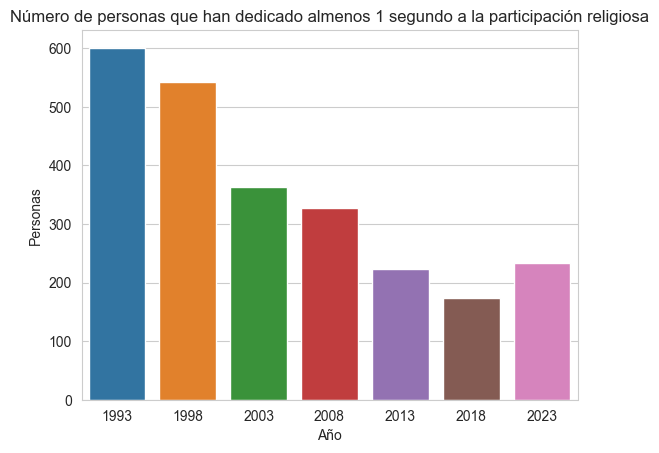

In [265]:
sns.barplot(df_religion_sin_cero)
plt.xlabel("Año")
plt.title("Número de personas que han dedicado almenos 1 segundo a la participación religiosa")
plt.ylabel("Personas");

Se crea un nuevo Data Frame que combine tanto el tiempo dedicado a la religión como el día de la semana que fueron encuestados

In [223]:
df_1993_rel = pd.concat([df_1993["ACTP2_53"], df_1993["PTP_DIASE1"]], axis=1)
df_1998_rel = pd.concat([df_1998["ACTP2_53"], df_1998["PTP_DIASE1"]], axis=1)
df_2003_rel = pd.concat([df_2003["ACTP2B_53"], df_2003["PTP_DIASE1"]], axis=1)
df_2008_rel = pd.concat([df_2008["ACTP2B_53"], df_2008["PTP_DIASE1"]], axis=1)
df_2013_rel = pd.concat([df_2013["ACTP2B_53"], df_2013["PTP_DIASE1"]], axis=1)
df_2018_rel = pd.concat([df_2018["ACTP2B_53"], df_2018["PTP_DIASE1"]], axis=1)
df_2023_rel = pd.concat([df_2023["ACTP2B_53"], df_2023["PTP_DIASE1"]], axis=1)


In [224]:
df_rel_sem = pd.concat([df_1993_rel, df_1998_rel, df_2003_rel, df_2008_rel, df_2013_rel, df_2018_rel, df_2023_rel])

Para entender un poco más la distribución de las personas que tienen participación religiosa se evaluará de estas el día de la semana que fueron encuestadas.

De las persona que han dedicado al menos un segundo a la religión se representa con un diagrama de tarta el porcentaje del día que fueron preguntado en la encuesta

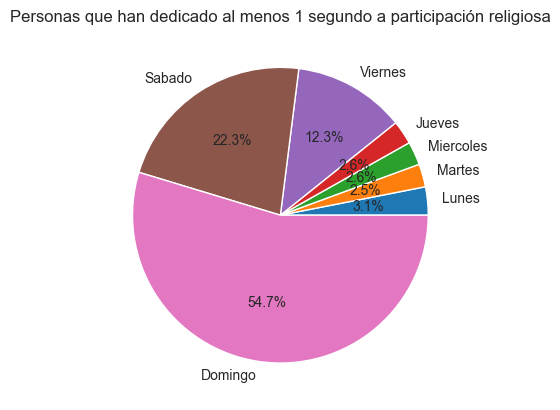

In [268]:
plt.pie(df_rel_sem[ (df_rel_sem["ACTP2_53"]>0) | (df_rel_sem["ACTP2B_53"]>0)]["PTP_DIASE1"].value_counts().sort_index() ,labels=["Lunes","Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], autopct='%1.1f%%')
plt.title("Personas que han dedicado al menos 1 segundo a participación religiosa");



De las persona que NO han dedicado ningún segundo a la religión se representa con un diagrama de tarta el porcentaje del día que fueron preguntado en la encuesta

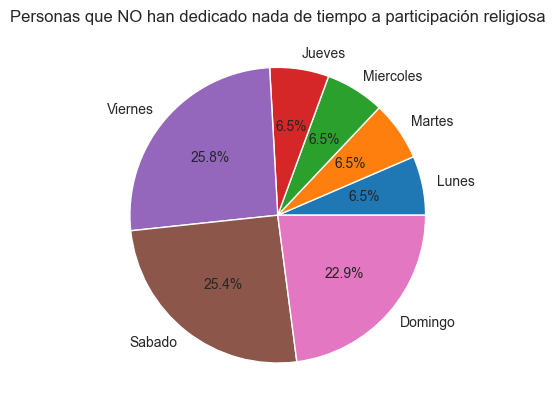

In [270]:
plt.pie(df_rel_sem[ (df_rel_sem["ACTP2_53"]==0) | (df_rel_sem["ACTP2B_53"]==0)]["PTP_DIASE1"].value_counts().sort_index() ,labels=["Lunes","Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], autopct='%1.1f%%')
plt.title("Días de la semana")
plt.title("Personas que NO han dedicado nada de tiempo a participación religiosa");


De la muestra general se representa con un diagrama de tarta el porcentaje del día que fueron preguntado en la encuesta

''

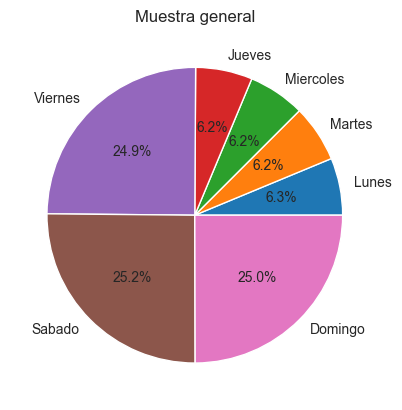

In [271]:
plt.pie(df_rel_sem["PTP_DIASE1"].value_counts().sort_index() ,labels=["Lunes","Martes", "Miercoles", "Jueves", "Viernes", "Sabado", "Domingo"], autopct='%1.1f%%')
plt.title("Días de la semana")
plt.title("Muestra general");

Para indagar más en profundidad sobre las personas que sí dedican tiempo a la participación religiosa vamos a elaborar un perfil tipo basado en el genero, la edad, el nivel de estudios y el estado civil.

Este perfil tipo lo  comparamos entre 1993 y 2023 paraa ver si ha habido algún cambio

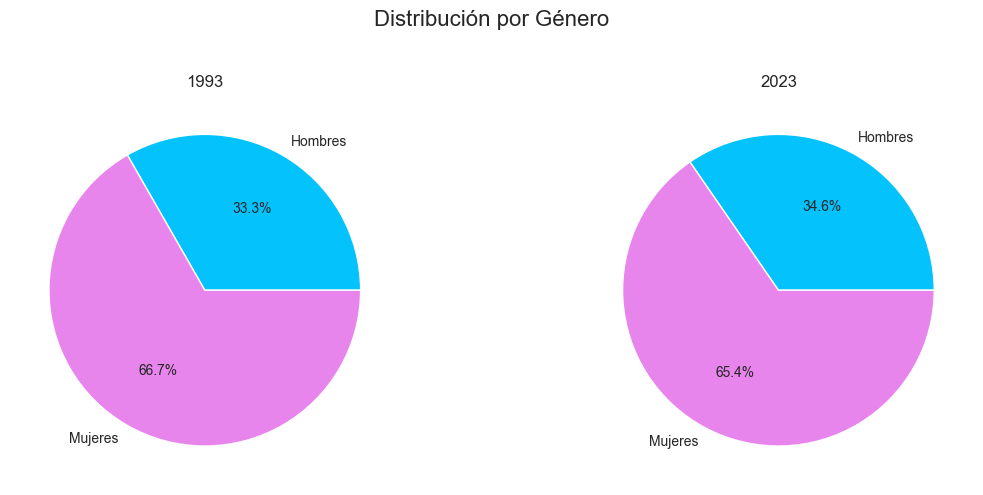

In [228]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df_1993[df_1993["ACTP2_53"]>0]["PTP_SEXO"].value_counts().sort_index(), labels=["Hombres", "Mujeres"], autopct="%1.1f%%",colors=["#03c2fc", "#e885ed"])
plt.title("1993")
plt.subplot(1,2,2)
plt.pie(df_2023[df_2023["ACTP2B_53"]>0]["PTP_SEXO"].value_counts().sort_index(), labels=["Hombres", "Mujeres"], autopct="%1.1f%%",colors=["#03c2fc", "#e885ed"])
plt.title("2023")
plt.suptitle("Distribución por Género", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]);

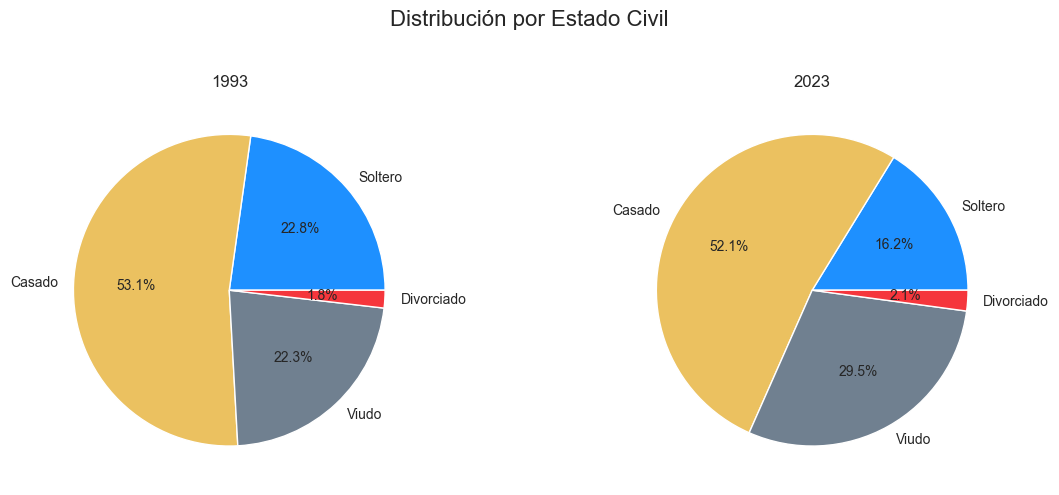

In [229]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df_1993[df_1993["ACTP2_53"]>0]["ESTADO_CIVIL"].value_counts().sort_index(), autopct="%1.1f%%",labels=["Soltero", "Casado", "Viudo", "Divorciado"], colors=["#1E90FF", "#ebc160", "#708090", "#f5363c"])
plt.title("1993")
plt.subplot(1,2,2)
plt.pie(df_2023[df_2023["ACTP2B_53"]>0]["ESTADO_CIVIL"].value_counts().sort_index(), autopct="%1.1f%%",labels=["Soltero", "Casado", "Viudo", "Divorciado"], colors=["#1E90FF", "#ebc160", "#708090", "#f5363c"])
plt.title("2023")
plt.suptitle("Distribución por Estado Civil", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]);


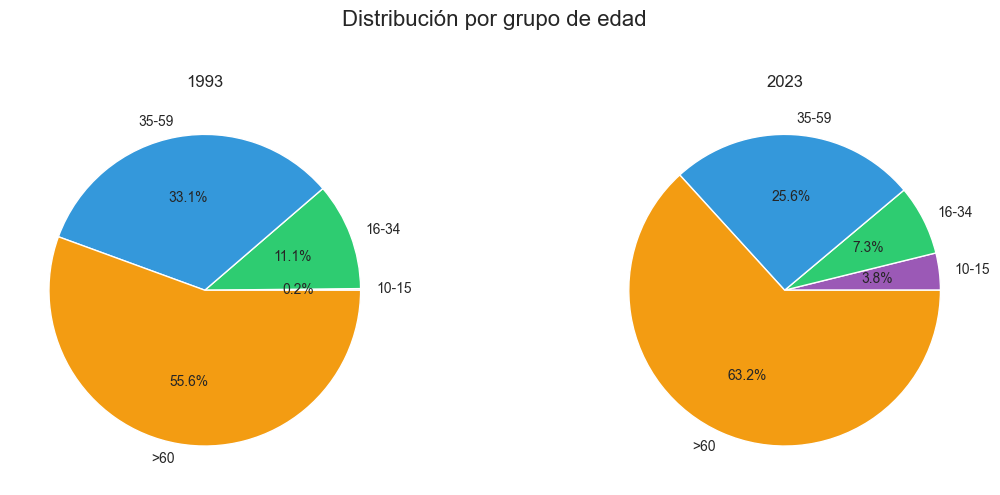

In [230]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df_1993[df_1993["ACTP2_53"]>0]["PTP_EDAD1_"].value_counts().sort_index(), autopct="%1.1f%%",labels=["10-15", "16-34", "35-59", ">60"], colors=["#9B59B6", "#2ECC71", "#3498DB", "#F39C12"])
plt.title("1993")
plt.subplot(1,2,2)
plt.pie(df_2023[df_2023["ACTP2B_53"]>0]["PTP_EDAD1_"].value_counts().sort_index(), autopct="%1.1f%%",labels=["10-15", "16-34", "35-59", ">60"], colors=["#9B59B6", "#2ECC71", "#3498DB", "#F39C12"])
plt.title("2023")
plt.suptitle("Distribución por grupo de edad", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]);

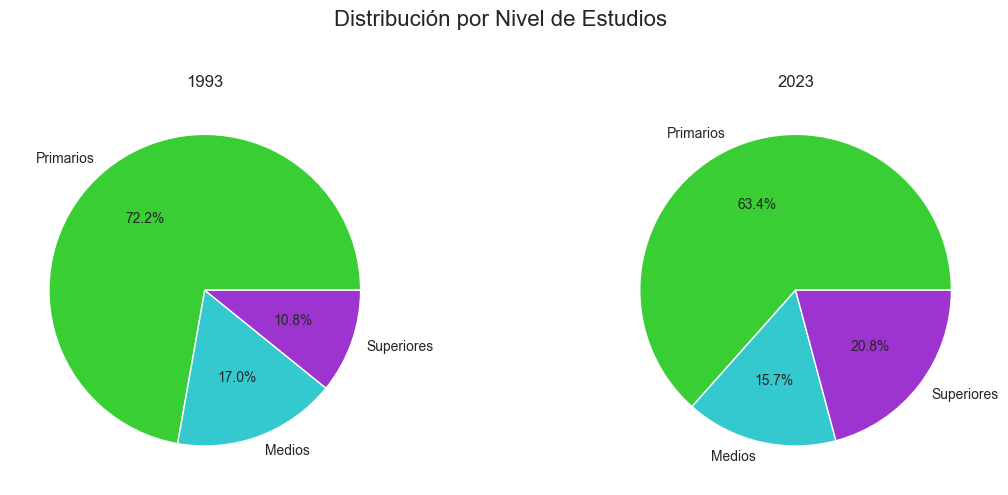

In [231]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.pie(df_1993[df_1993["ACTP2_53"]>0]["NIVEL_INSTRUC"].value_counts().sort_index(), autopct="%1.1f%%",labels=["Primarios", "Medios", "Superiores"], colors=["#39cf34", "#34c9cf", "#9d34cf" ])
plt.title("1993")
plt.subplot(1,2,2)
plt.pie(df_2023[df_2023["ACTP2B_53"]>0]["NIVEL_INSTRUC"].value_counts().sort_index(), autopct="%1.1f%%",labels=["Primarios", "Medios", "Superiores"], colors=["#39cf34", "#34c9cf", "#9d34cf" ])
plt.title("2023")
plt.suptitle("Distribución por Nivel de Estudios", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95]);

# Hipotesis 3:

Los jovenes utilizan más tiempo para hacer vida social que grupos de edad más avanzada.

Se crea un nuevo Data Frame con la media de tiempo dedicaada a lavida social en funcion de la edad de cada uno de los años. 

Se omite el grupo de edad 1 (10-15), ya que no es representativo en todas las muestras. 

Además, se busca hacer una comparativa entre grupos de edad que proactivamente puedan dedicar ese tiempo a la vida social.

In [232]:
df_vida_social = pd.DataFrame({"1993":(df_1993.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:],
                               "1998":(df_1998.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index(),
                               "2003":(df_2003.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:],
                               "2008":(df_2008.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:],
                               "2013":(df_2013.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:],
                               "2018":(df_2018.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:],
                               "2023":(df_2023.groupby("PTP_EDAD1_")["ACTP1_5"].mean()/3600).sort_index().iloc[1:]})

Se crea un diccionario con las etiquetas de cada grupo de edad

In [233]:
edades = { 2.0: "16-34",
          3.0: "35-59",
          4.0: ">=60"}

Se transpone el DF para su representacion y se renombra las columnas de edades con etiquetas claras de cada grupo

In [234]:
df_vida_social_t = df_vida_social.T

In [235]:
df_vida_social_t.rename(columns=edades, inplace=True)


Se representa con un lineas de barras el tiempo dedicado a la vida social en función del año y del grupo de edad

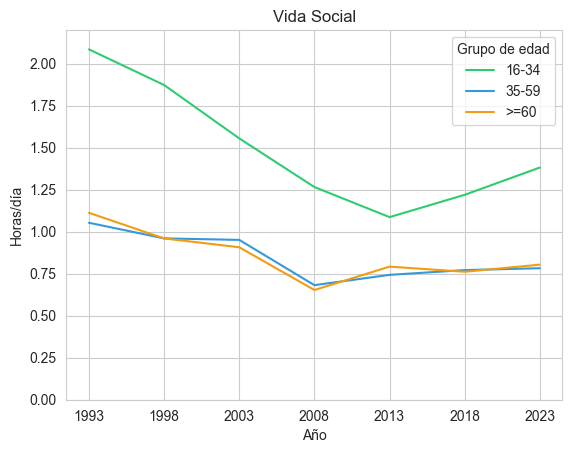

In [277]:
sns.lineplot(data=df_vida_social.iloc[0], label="16-34", color="#2ECC71")
sns.lineplot(data=df_vida_social.iloc[1], label="35-59", color="#3498DB")
sns.lineplot(data=df_vida_social.iloc[2], label= ">=60", color="#F39C12")
plt.title("Vida Social")
plt.xlabel("Año")
plt.ylabel("Horas/día")
plt.ylim(0,2.2)
plt.legend(title="Grupo de edad");

# Conclusiones

- Los jóvenes dedican consistentemente más tiempo a la vida social en comparación con los grupos de mayor edad, aunque esta tendencia ha variado ligeramente en función de los períodos estudiados.

- La diferencia en el tiempo dedicado a las tareas del hogar entre hombres y mujeres muestra una tendencia decreciente, aunque persiste una brecha significativa.

- El tiempo invertido y el número de personas que participan en actividades religiosas ha disminuido considerablemente desde 1993.